<a href="https://colab.research.google.com/github/lyloc-logtech/ai-code/blob/main/bainoplai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,10.1,0.1),'food')
service = ctrl.Antecedent(np.arange(0,10.1,0.1),'service')
tip = ctrl.Consequent(np.arange(10,25.1,0.1),'tip')
food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])
tip['poor'] = fuzz.trimf(tip.universe,[10,13.75,17.5])
tip['average'] = fuzz.trimf(tip.universe,[13.75,17.5,25])
tip['good'] = fuzz.trimf(tip.universe,[17.5,20.75,25])
service['good'] = fuzz.trimf(service.universe,[5,10,10])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['poor'] = fuzz.trimf(service.universe,[0,0,5])

In [ ]:
rule1=ctrl.Rule(food['poor'] & service['poor'],tip['poor'])
rule2=ctrl.Rule(food['poor'] & service['average'],tip['poor'])
rule3=ctrl.Rule(food['poor'] & service['good'],tip['average'])
rule4=ctrl.Rule(food['average'] & service['poor'],tip['poor'])
rule5=ctrl.Rule(food['average'] & service['average'],tip['average'])
rule6=ctrl.Rule(food['average'] & service['good'],tip['good'])
rule7=ctrl.Rule(food['good'] & service['poor'],tip['average'])
rule8=ctrl.Rule(food['good'] & service['average'],tip['good'])
rule9=ctrl.Rule(food['good'] & service['good'],tip['good'])


13.750000000000005


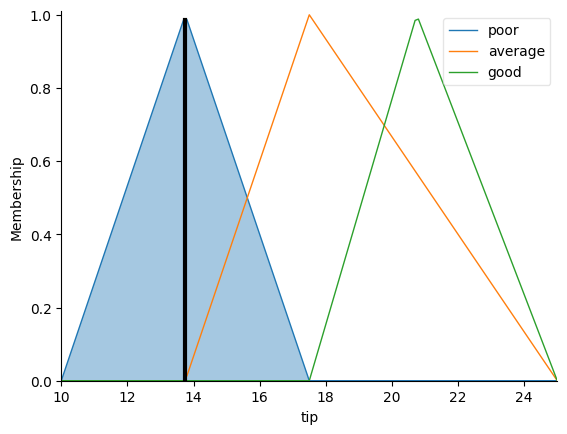

In [ ]:
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=0
tipping.input['service']=0
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

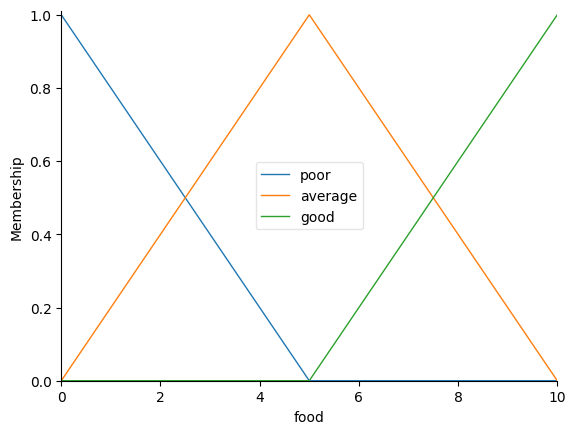

In [ ]:
food.view()

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
temperature = ctrl.Antecedent(np.arange(0,41,1),'temperature')
humidity = ctrl.Antecedent(np.arange(0,101,1),'humidity')
fan_speed = ctrl.Consequent(np.arange(0,101,1),'fan_speed')
temperature['cold'] = fuzz.trimf(temperature.universe,[0,0,20])
temperature['warm'] = fuzz.trimf(temperature.universe,[10,25,40])
temperature['hot'] = fuzz.trimf(temperature.universe,[30,40,40])
humidity['low'] = fuzz.trimf(humidity.universe,[0,0,50])
humidity['medium'] = fuzz.trimf(humidity.universe,[30,50,70])
humidity['high'] = fuzz.trimf(humidity.universe,[50,100,100])
fan_speed['low'] = fuzz.trimf(fan_speed.universe,[0,0,50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe,[30,50,70])
fan_speed['high'] = fuzz.trimf(fan_speed.universe,[50,100,100])


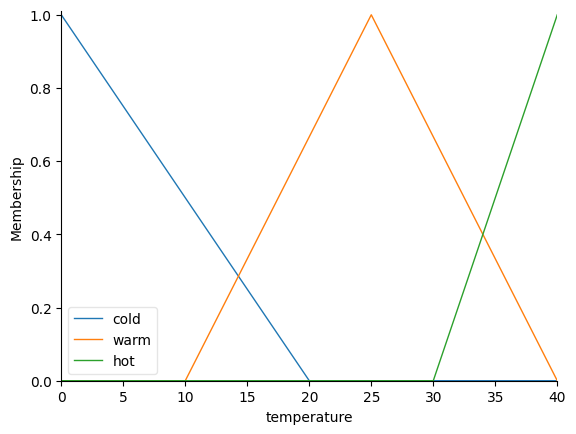

In [ ]:
temperature.view()


In [ ]:
rule1=ctrl.Rule(temperature['cold'] & humidity['low'],fan_speed['low'])
rule2=ctrl.Rule(temperature['cold'] & humidity['medium'],fan_speed['low'])
rule3=ctrl.Rule(temperature['cold'] & humidity['high'],fan_speed['medium'])
rule4=ctrl.Rule(temperature['warm'] & humidity['low'],fan_speed['low'])
rule5=ctrl.Rule(temperature['warm'] & humidity['medium'],fan_speed['medium'])
rule6=ctrl.Rule(temperature['warm'] & humidity['high'],fan_speed['high'])
rule7=ctrl.Rule(temperature['hot'] & humidity['low'],fan_speed['medium'])
rule8=ctrl.Rule(temperature['hot'] & humidity['medium'],fan_speed['high'])
rule9=ctrl.Rule(temperature['hot'] & humidity['high'],fan_speed['high'])

In [ ]:
fan_speed_control=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
fan_speed_simulation=ctrl.ControlSystemSimulation(fan_speed_control)

60.16199376947047


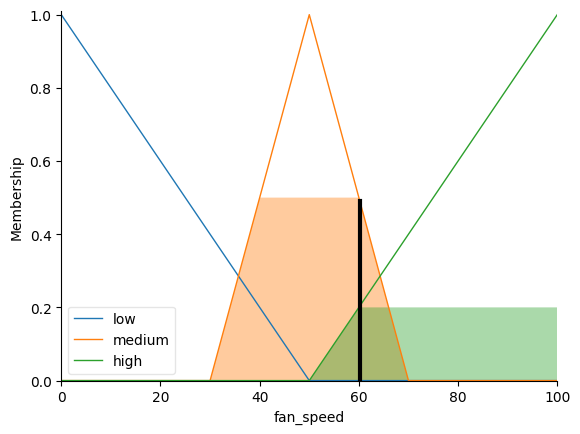

In [ ]:
fan_speed_simulation.input['temperature']=25
fan_speed_simulation.input['humidity']=60
fan_speed_simulation.compute()
print(fan_speed_simulation.output['fan_speed'])
fan_speed.view(sim=fan_speed_simulation)

In [8]:
#2.10
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
Trafic=ctrl.Antecedent(np.arange(0,11,1),'Trafic')
Distance=ctrl.Antecedent(np.arange(0,16,1),'Distance')
Wether=ctrl.Antecedent(np.arange(0,3,1),'Wether')
Prep_time=ctrl.Antecedent(np.arange(0,26,1),'Prep_time')
Fatigue=ctrl.Antecedent(np.arange(0,11,1),'Fatigue')
Delivery_time=ctrl.Consequent(np.arange(0,41,1),'Delivery_time')
Incentive=ctrl.Consequent(np.arange(0,61,1),'Incentive')
Rating=ctrl.Consequent(np.arange(1,6,1),'Rating')
#MUC DO TAC NGHEN
Trafic['Low']=fuzz.trimf(Trafic.universe,[0,0,5])
Trafic['Medium']=fuzz.trimf(Trafic.universe,[0,5,10])
Trafic['High']=fuzz.trimf(Trafic.universe,[5,10,10])
#KHOANG CACH
Distance['Short']=fuzz.trimf(Distance.universe,[0,0,3])
Distance['Medium']=fuzz.trimf(Distance.universe,[3,5.5,8])
Distance['Long']=fuzz.trimf(Distance.universe,[8,11.5,15])
#THOI TIET
Wether['Clear']=fuzz.trimf(Wether.universe,[0,5,5])
Wether['Rainy']=fuzz.trimf(Wether.universe,[0,5,10])
Wether['Stormy']=fuzz.trimf(Wether.universe,[5,5,10])
#THOI GIAN CHUAN BI
Prep_time['Fast']=fuzz.trimf(Prep_time.universe,[0,0,5])
Prep_time['Medium']=fuzz.trimf(Prep_time.universe,[5,10,15])
Prep_time['Slow']=fuzz.trimf(Prep_time.universe,[10,15,20])
#MUC DO MET MOI
Fatigue['Low']=fuzz.trimf(Fatigue.universe,[0,0,2.5])
Fatigue['Medium']=fuzz.trimf(Fatigue.universe,[2.5,5,7.5])
Fatigue['High']=fuzz.trimf(Fatigue.universe,[8,10,10])
#THOI GAIN GIAO HANG
Delivery_time['Short']=fuzz.trimf(Delivery_time.universe,[0,0,10])
Delivery_time['Medium']=fuzz.trimf(Delivery_time.universe,[10,17.5,25])
Delivery_time['Long']=fuzz.trimf(Delivery_time.universe,[25,30,35])
#TIEN KHUYEN KHICH
Incentive['Low']=fuzz.trimf(Incentive.universe,[0,0,20])
Incentive['Medium']=fuzz.trimf(Incentive.universe,[10,30,50])
Incentive['High']=fuzz.trimf(Incentive.universe,[40,60,60])
#DANH GIA
Rating['Poor']=fuzz.trimf(Rating.universe,[0,0,3])
Rating['Average']=fuzz.trimf(Rating.universe,[2,4,4])
Rating['Good']=fuzz.trimf(Rating.universe,[3,5,5])

In [9]:
rule1=ctrl.Rule(Trafic['Low'] & Distance['Short'], Delivery_time['Short'])
rule2=ctrl.Rule(Trafic['Medium']& Distance['Medium'],Delivery_time['Medium'])
rule3=ctrl.Rule(Trafic['High'] & Distance['Long'],Delivery_time['Long'])
rule4=ctrl.Rule(Wether['Clear'] ,Incentive['Low'])
rule5=ctrl.Rule(Wether['Rainy'] ,Incentive['Medium'])
rule6=ctrl.Rule(Wether['Stormy'] ,Incentive['High'])
rule7=ctrl.Rule(Prep_time['Fast'] & Trafic['Low'],Delivery_time['Short'])
rule8=ctrl.Rule(Prep_time['Medium'] & Trafic['Medium'] ,Delivery_time['Medium'])
rule9=ctrl.Rule(Prep_time['Slow'] & Trafic['High'] ,Delivery_time['Long'])
rule10=ctrl.Rule(Fatigue['Low'] ,Rating['Good'])
rule11=ctrl.Rule(Fatigue['Medium'] ,Rating['Average'])
rule12=ctrl.Rule(Fatigue['High'] ,Rating['Poor'])
rule13=ctrl.Rule(Distance['Long'] & Wether['Stormy'] & Trafic['High'] ,(Delivery_time['Long'],Incentive['High']))
rule14=ctrl.Rule(Distance['Short'] & Wether['Clear'] & Trafic['Low'] ,(Delivery_time['Short'],Incentive['Low']))
rule15=ctrl.Rule(Fatigue['High']  & Trafic['High'] ,(Rating['Poor'] , Delivery_time['Long']))

Thời gian dự kiến: 17.500000000000004
Thưởng: 23.25998142989786
Đánh giá: 4.0962962962962965


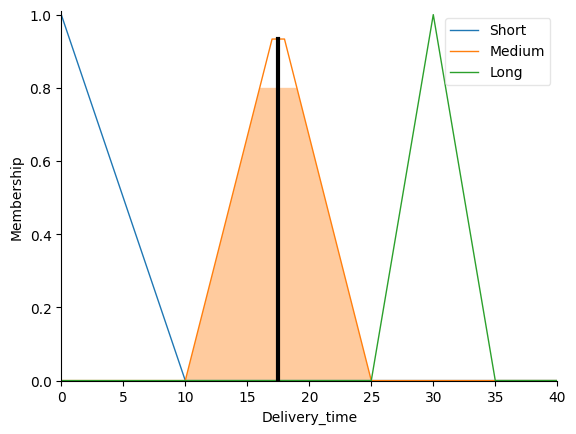

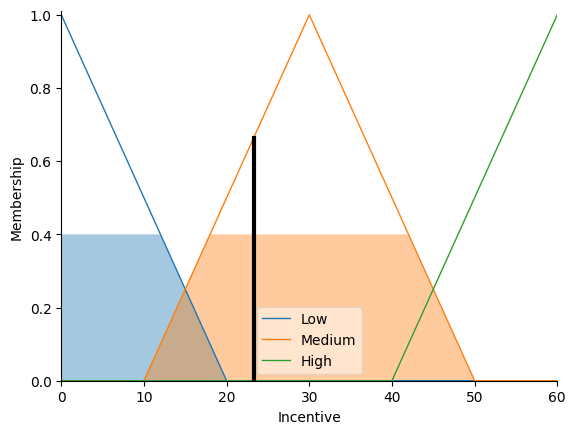

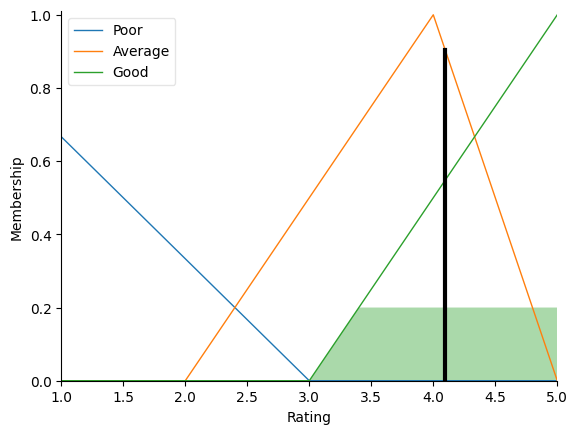

In [10]:
control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['Trafic'] = 5
fuzzy_system.input['Distance'] = 5
fuzzy_system.input['Wether'] = 2
fuzzy_system.input['Prep_time'] = 7
fuzzy_system.input['Fatigue'] = 2

fuzzy_system.compute()

print(f"Thời gian dự kiến: {fuzzy_system.output['Delivery_time']}")
print(f"Thưởng: {fuzzy_system.output['Incentive']}")
print(f"Đánh giá: {fuzzy_system.output['Rating']}")

Delivery_time.view(sim=fuzzy_system)
Incentive.view(sim=fuzzy_system)
Rating.view(sim=fuzzy_system)

In [ ]:
#2.1
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
wind = ctrl.Antecedent(np.arange(0.7, 3.2, 0.1), 'wind')
temperature = ctrl.Antecedent(np.arange(20.4, 39.7, 0.1), 'temperature')
rainfall = ctrl.Consequent(np.arange(0.2, 9.3, 0.1), 'rainfall')
wind['very_low'] = fuzz.trimf(wind.universe, [0.7, 1.1, 1.5])
wind['low'] = fuzz.trimf(wind.universe, [1.1, 1.5, 1.9])
wind['normal'] = fuzz.trimf(wind.universe, [1.5, 1.9, 2.3])
wind['high'] = fuzz.trimf(wind.universe, [1.9, 2.3, 2.7])
wind['very_high'] = fuzz.trimf(wind.universe, [2.3, 2.7, 3.1])
temperature['very_low'] = fuzz.trimf(temperature.universe, [20.4, 23.6, 26.8])
temperature['low'] = fuzz.trimf(temperature.universe, [23.6, 26.8, 30])
temperature['normal'] = fuzz.trimf(temperature.universe, [26.8, 30, 33.2])
temperature['high'] = fuzz.trimf(temperature.universe, [30, 33.2, 36.4])
temperature['very_high'] = fuzz.trimf(temperature.universe, [33.2, 36.4, 39.6])
rainfall['very_low'] = fuzz.trimf(rainfall.universe, [0.2, 1.7, 3.2])
rainfall['low'] = fuzz.trimf(rainfall.universe, [1.7, 3.2, 4.7])
rainfall['normal'] = fuzz.trimf(rainfall.universe, [3.2, 4.7, 6.2])
rainfall['high'] = fuzz.trimf(rainfall.universe, [4.7, 6.2, 7.7])
rainfall['very_high'] = fuzz.trimf(rainfall.universe, [6.2, 7.7, 9.2])

In [ ]:
rule1=ctrl.Rule(wind['low'] & temperature['low'],rainfall['low'])
rule2=ctrl.Rule(wind['low'] & temperature['high'],rainfall['normal'])
rule3=ctrl.Rule(wind['normal'] & temperature['normal'],rainfall['high'])
rule4=ctrl.Rule(wind['normal'] & temperature['high'],rainfall['very_high'])
rule5=ctrl.Rule(wind['high'] & temperature['normal'],rainfall['very_high'])
rule6=ctrl.Rule(wind['high'] & temperature['high'],rainfall['very_high'])




7.265541330527305


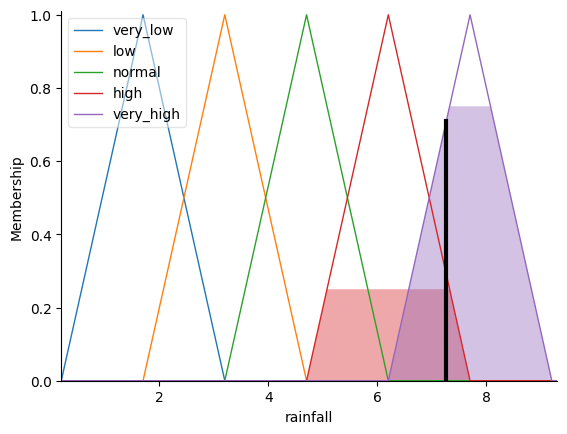

In [ ]:
rainfalling_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6])
rainfalling = ctrl.ControlSystemSimulation(rainfalling_ctrl)
rainfalling.input['wind'] = 2.2
rainfalling.input['temperature'] = 30
rainfalling.compute()
print(rainfalling.output['rainfall'])
rainfall.view(sim=rainfalling)

In [ ]:
#2.2
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
blood_sugar_lv=ctrl.Antecedent(np.arange(0,202,1),'blood_sugar_lv')
BMI=ctrl.Antecedent(np.arange(0,32,1),'BMI')
Frequent_Urination=ctrl.Antecedent(np.arange(0,11,1),'Frequent_Urination')
Fatigue_lv=ctrl.Antecedent(np.arange(0,11,1),'Fatigue_lv')
Risk=ctrl.Consequent(np.arange(0,16,1),'Risk')
blood_sugar_lv['low']=fuzz.trimf(blood_sugar_lv.universe,[0,0,80])
blood_sugar_lv['normal']=fuzz.trimf(blood_sugar_lv.universe,[80,80,120])
blood_sugar_lv['high']=fuzz.trimf(blood_sugar_lv.universe,[120,120,200])
blood_sugar_lv['very_high']=fuzz.trimf(blood_sugar_lv.universe,[120,200,201])
BMI['underweight']=fuzz.trimf(BMI.universe,[0,0,18.5])
BMI['normal']=fuzz.trimf(BMI.universe,[18.5,18.5,25])
BMI['overweight']=fuzz.trimf(BMI.universe,[25,25,30])
BMI['obese']=fuzz.trimf(BMI.universe,[25,30,31])
Frequent_Urination['rarely']=fuzz.trimf(Frequent_Urination.universe,[0,0,5])
Frequent_Urination['sometimes']=fuzz.trimf(Frequent_Urination.universe,[0,5,10])
Frequent_Urination['often']=fuzz.trimf(Frequent_Urination.universe,[5,10,10])
Fatigue_lv['low']=fuzz.trimf(Fatigue_lv.universe,[0,0,5])
Fatigue_lv['moderate']=fuzz.trimf(Fatigue_lv.universe,[0,5,10])
Fatigue_lv['high']=fuzz.trimf(Fatigue_lv.universe,[5,10,10])
Risk['low']=fuzz.trimf(Risk.universe,[0,0,5])
Risk['medium']=fuzz.trimf(Risk.universe,[0,5,10])
Risk['high']=fuzz.trimf(Risk.universe,[5,10,15])
Risk['very_high']=fuzz.trimf(Risk.universe,[10,15,15])

In [ ]:
rule1=ctrl.Rule(blood_sugar_lv['very_high'] &  Frequent_Urination['often'] ,Risk['very_high'])
rule2=ctrl.Rule(blood_sugar_lv['very_high'] &  Frequent_Urination['sometimes'] ,Risk['high'])
rule3=ctrl.Rule(blood_sugar_lv['high'] &  Frequent_Urination['sometimes'] ,Risk['high'])
rule4=ctrl.Rule(blood_sugar_lv['normal'] &  Frequent_Urination['rarely'] ,Risk['low'])
rule5=ctrl.Rule(blood_sugar_lv['very_high'] &  BMI['obese'] ,Risk['very_high'])
rule6=ctrl.Rule(blood_sugar_lv['very_high'] &  BMI['overweight'] ,Risk['high'])
rule7=ctrl.Rule(blood_sugar_lv['high'] &  BMI['overweight'] ,Risk['medium'])
rule8=ctrl.Rule(blood_sugar_lv['normal'] &  BMI['normal'] ,Risk['low'])
rule9=ctrl.Rule(blood_sugar_lv['very_high'] & Fatigue_lv['high'] ,Risk['very_high'])
rule10=ctrl.Rule(blood_sugar_lv['high'] & Fatigue_lv['high'] ,Risk['high'])
rule11=ctrl.Rule(blood_sugar_lv['high'] & Fatigue_lv['moderate'] ,Risk['medium'])
rule12=ctrl.Rule(blood_sugar_lv['normal'] & Fatigue_lv['low'] ,Risk['low'])
rule13=ctrl.Rule(blood_sugar_lv['high'] &  BMI['overweight'] ,Risk['high'])

10.846560846560848


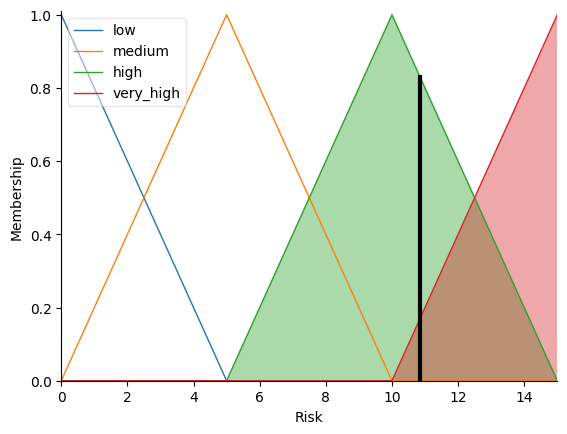

In [ ]:
Risk_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13])
Risk_simulator=ctrl.ControlSystemSimulation(Risk_ctrl)

Risk_simulator.input['blood_sugar_lv']=200
Risk_simulator.input['BMI']=25
Risk_simulator.input['Frequent_Urination']=10
Risk_simulator.input['Fatigue_lv']=10
Risk_simulator.compute()
print(Risk_simulator.output['Risk'])
Risk.view(sim=Risk_simulator)

In [ ]:
#2.3
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
demand=ctrl.Antecedent(np.arange(0,16,1),'demand')
competitor=ctrl.Antecedent(np.arange(0,11,1),'competitor')
production=ctrl.Antecedent(np.arange(0,16,1),'production')
seasonality=ctrl.Antecedent(np.arange(0,11,1),'seasonality')
stock=ctrl.Antecedent(np.arange(0,16,1),'stock')
final_price=ctrl.Consequent(np.arange(0,21,1),'final_price')
demand['very_low']=fuzz.trimf(demand.universe,[0,0,5])
demand['low']=fuzz.trimf(demand.universe,[0,5,10])
demand['medium']=fuzz.trimf(demand.universe,[5,10,15])
demand['high']=fuzz.trimf(demand.universe,[10,15,15])
competitor['low']=fuzz.trimf(competitor.universe,[0,0,5])
competitor['medium']=fuzz.trimf(competitor.universe,[0,5,10])
competitor['high']=fuzz.trimf(competitor.universe,[5,10,10])
production['very_low']=fuzz.trimf(production.universe,[0,0,5])
production['low']=fuzz.trimf(production.universe,[0,5,10])
production['medium']=fuzz.trimf(production.universe,[5,10,15])
production['high']=fuzz.trimf(production.universe,[10,15,20])
seasonality['off_peak']=fuzz.trimf(seasonality.universe,[0,0,5])
seasonality['normal']=fuzz.trimf(seasonality.universe,[0,5,10])
seasonality['peak']=fuzz.trimf(seasonality.universe,[5,10,10])
stock['low']=fuzz.trimf(stock.universe,[0,0,5])
stock['medium']=fuzz.trimf(stock.universe,[0,5,10])
stock['high']=fuzz.trimf(stock.universe,[5,10,15])
stock['very_high']=fuzz.trimf(stock.universe,[10,15,15])
final_price['very_low']=fuzz.trimf(final_price.universe,[0,0,5])
final_price['low']=fuzz.trimf(final_price.universe,[0,5,10])
final_price['medium']=fuzz.trimf(final_price.universe,[5,10,15])
final_price['high']=fuzz.trimf(final_price.universe,[10,15,20])
final_price['very_high']=fuzz.trimf(final_price.universe,[15,20,20])

In [ ]:
rule1=ctrl.Rule(demand['high'] & competitor['high']  & stock['low'],final_price['very_high'])
rule2=ctrl.Rule(demand['high'] & seasonality['peak']  & stock['low'],final_price['very_high'])
rule3=ctrl.Rule(demand['medium'] & production['high']  & stock['low'],final_price['very_high'])
rule4=ctrl.Rule(demand['high'] & competitor['medium']  & stock['medium'],final_price['high'])
rule5=ctrl.Rule(demand['medium'] & competitor['high']  & stock['low'],final_price['high'])
rule6=ctrl.Rule(demand['high'] & seasonality['peak']  & stock['medium'],final_price['high'])
rule7=ctrl.Rule(demand['medium'] & production['medium']  & stock['medium'],final_price['medium'])
rule8=ctrl.Rule(demand['low'] & competitor['high']  & stock['medium'],final_price['medium'])
rule9=ctrl.Rule(demand['medium'] & competitor['medium']  & stock['medium'],final_price['medium'])
rule10=ctrl.Rule(demand['low'] & competitor['low']  & stock['high'],final_price['low'])
rule11=ctrl.Rule(demand['medium'] & production['low']  & stock['high'],final_price['low'])
rule12=ctrl.Rule(demand['low'] & seasonality['off_peak']  & stock['high'],final_price['low'])
rule13=ctrl.Rule(demand['low'] & competitor['low']  & stock['very_high'],final_price['very_low'])
rule14=ctrl.Rule(demand['medium'] & production['very_low']  & stock['very_high'],final_price['very_low'])
rule15=ctrl.Rule(demand['very_low'] & seasonality['off_peak']  & stock['very_high'],final_price['very_low'])
rule_default = ctrl.Rule(demand['medium'] | competitor['medium'] | production['medium'] | seasonality['normal'] | stock['medium'], final_price['medium'])





10.000000000000002


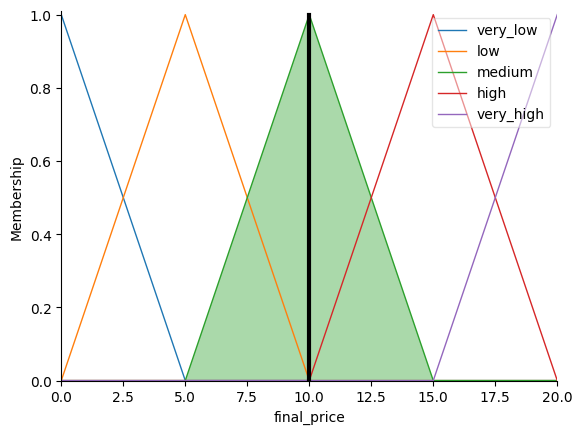

In [ ]:
ctrl_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule_default])
final_price_simulator=ctrl.ControlSystemSimulation(ctrl_system)
final_price_simulator.input['demand']=10
final_price_simulator.input['competitor']=10
final_price_simulator.input['production']=10
final_price_simulator.input['seasonality']=10
final_price_simulator.input['stock']=10
final_price_simulator.compute()
print(final_price_simulator.output['final_price'])
final_price.view(sim=final_price_simulator)

In [ ]:
#2.4
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
load=ctrl.Antecedent(np.arange(0,11,1),'load')
dirt=ctrl.Antecedent(np.arange(0,11,1),'dirt')
fabric_type=ctrl.Antecedent(np.arange(0,11,1),'fabric_type')
time=ctrl.Consequent(np.arange(0,21,1),'time')
water=ctrl.Consequent(np.arange(0,16,1),'water')
load['S']=fuzz.trimf(load.universe,[0,0,5])
load['M']=fuzz.trimf(load.universe,[0,5,10])
load['L']=fuzz.trimf(load.universe,[5,10,10])
dirt['L']=fuzz.trimf(dirt.universe,[0,0,5])
dirt['M']=fuzz.trimf(dirt.universe,[0,5,10])
dirt['H']=fuzz.trimf(dirt.universe,[5,10,10])
fabric_type['D']=fuzz.trimf(fabric_type.universe,[0,0,5])
fabric_type['N']=fuzz.trimf(fabric_type.universe,[0,5,10])
fabric_type['H']=fuzz.trimf(fabric_type.universe,[5,10,10])
time['VS']=fuzz.trimf(time.universe,[0,0,5])
time['S']=fuzz.trimf(time.universe,[0,5,10])
time['M']=fuzz.trimf(time.universe,[5,10,15])
time['L']=fuzz.trimf(time.universe,[10,15,20])
time['VL']=fuzz.trimf(time.universe,[15,20,20])
water['L']=fuzz.trimf(water.universe,[0,0,5])
water['M']=fuzz.trimf(water.universe,[0,5,10])
water['H']=fuzz.trimf(water.universe,[5,10,15])
water['VH']=fuzz.trimf(water.universe,[10,15,15])

In [ ]:
rule1=ctrl.Rule(load['S'] & dirt['L'] ,( time['S'],water['L']))
rule2=ctrl.Rule(load['S'] & dirt['M'] ,( time['M'],water['M']))
rule3=ctrl.Rule(load['S'] & dirt['H'] ,( time['L'],water['M']))
rule4=ctrl.Rule(load['M'] & dirt['L'] ,( time['M'],water['M']))
rule5=ctrl.Rule(load['M'] & dirt['M'] ,( time['L'],water['M']))
rule6=ctrl.Rule(load['M'] & dirt['H'] ,( time['L'],water['H']))
rule7=ctrl.Rule(load['L'] & dirt['L'] ,( time['M'],water['H']))
rule8=ctrl.Rule(load['L'] & dirt['L'] ,( time['L'],water['H']))
rule9=ctrl.Rule(load['L'] & dirt['M'] ,( time['L'],water['H']))
rule10=ctrl.Rule(load['L'] & dirt['H'] ,( time['L'],water['H']))
rule11=ctrl.Rule(fabric_type['D'] ,( time['S'] ,water['L']))
rule12=ctrl.Rule(fabric_type['N'] ,( time['M'] ,water['M']))
rule13=ctrl.Rule(fabric_type['H'] ,( time['L'] ,water['H']))
rule14=ctrl.Rule(load['L'] & dirt['H'] & fabric_type['H'],( time['VL'] ,water['VH']))
rule15=ctrl.Rule(load['S'] & dirt['L'] & fabric_type['D'],( time['VS'] ,water['L']))
rule16=ctrl.Rule(load['M'] & dirt['M'] & fabric_type['N'],( time['M'] ,water['M']))

12.5
5.000000000000001


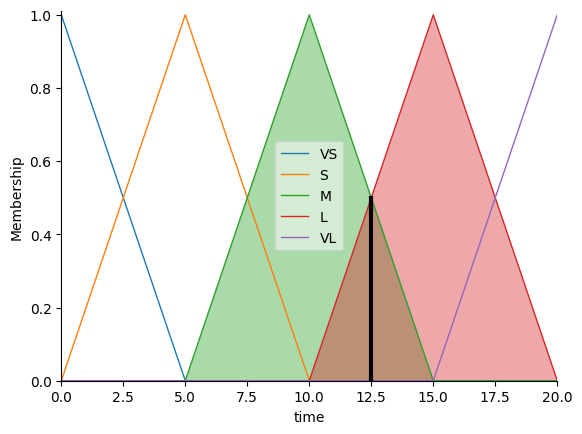

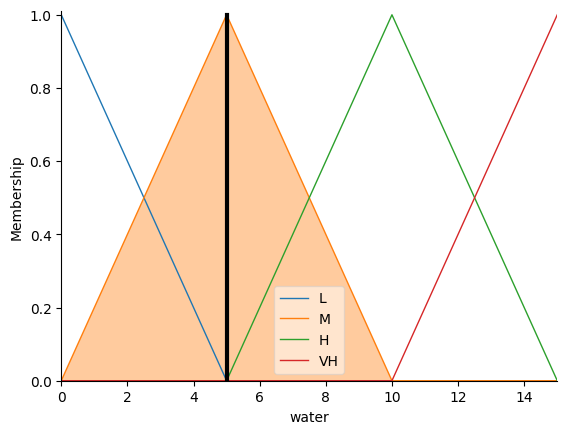

In [ ]:
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['load']=5
fuzzy_system.input['dirt']=5
fuzzy_system.input['fabric_type']=5
fuzzy_system.compute()
print(fuzzy_system.output['time'])
print(fuzzy_system.output['water'])
time.view(sim=fuzzy_system)
water.view(sim=fuzzy_system)

In [ ]:
#2.5
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
temperature = ctrl.Antecedent(np.arange(0,41,1),'temperature')
humidity = ctrl.Antecedent(np.arange(0,101,1),'humidity')
people=ctrl.Antecedent(np.arange(0,11,1),'people')
fan_speed = ctrl.Consequent(np.arange(0,101,1),'fan_speed')
cooling_lv=ctrl.Consequent(np.arange(0,11,1),'cooling_lv')
temperature['C'] = fuzz.trimf(temperature.universe,[0,0,20])
temperature['CL'] = fuzz.trimf(temperature.universe,[10,25,40])
temperature['CM'] = fuzz.trimf(temperature.universe,[30,40,40])
temperature['W']= fuzz.trimf(temperature.universe,[30,40,40])
temperature['H']= fuzz.trimf(temperature.universe,[30,40,40])
humidity['L'] = fuzz.trimf(humidity.universe,[0,0,50])
humidity['M'] = fuzz.trimf(humidity.universe,[30,50,70])
humidity['H'] = fuzz.trimf(humidity.universe,[50,100,100])
people['F'] = fuzz.trimf(people.universe,[0,0,5])
people['M'] = fuzz.trimf(people.universe,[0,5,10])
people['MA']= fuzz.trimf(people.universe,[5,10,10])
fan_speed['L'] = fuzz.trimf(fan_speed.universe,[0,0,50])
fan_speed['M'] = fuzz.trimf(fan_speed.universe,[30,50,70])
fan_speed['H'] = fuzz.trimf(fan_speed.universe,[50,100,100])
cooling_lv['L'] = fuzz.trimf(cooling_lv.universe,[0,0,5])
cooling_lv['M'] = fuzz.trimf(cooling_lv.universe,[0,5,10])
cooling_lv['H'] = fuzz.trimf(cooling_lv.universe,[5,10,10])


In [ ]:
rule1=ctrl.Rule(temperature['C'],fan_speed['L'])
rule2=ctrl.Rule(temperature['CL'],fan_speed['L'])
rule3=ctrl.Rule(temperature['CM'],fan_speed['M'])
rule4=ctrl.Rule(temperature['W'],fan_speed['H'])
rule5=ctrl.Rule(temperature['H'],fan_speed['H'])
rule6=ctrl.Rule(temperature['C'],cooling_lv['L'])
rule7=ctrl.Rule(temperature['CL'],cooling_lv['L'])
rule8=ctrl.Rule(temperature['CM'],cooling_lv['M'])
rule9=ctrl.Rule(temperature['W'],cooling_lv['H'])
rule10=ctrl.Rule(temperature['H'],cooling_lv['H'])
rule11=ctrl.Rule(humidity['L'],cooling_lv['L'])
rule12=ctrl.Rule(humidity['M'],cooling_lv['M'])
rule13=ctrl.Rule(humidity['H'],cooling_lv['H'])
rule14=ctrl.Rule(people['F'],cooling_lv['L'])
rule15=ctrl.Rule(people['M'],cooling_lv['M'])
rule16=ctrl.Rule(people['MA'],cooling_lv['H'])
rule17=ctrl.Rule(temperature['H']& humidity['H']& people['MA'],(fan_speed['H'],cooling_lv['H']))
rule18=ctrl.Rule(temperature['CM']& humidity['M']& people['M'],(fan_speed['M'],cooling_lv['M']))
rule19=ctrl.Rule(temperature['CL']& humidity['L']& people['F'],(fan_speed['L'],cooling_lv['L']))

16.666666666666664
4.239583333333334


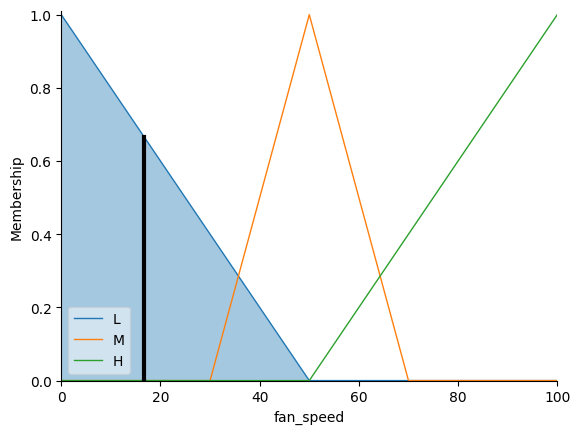

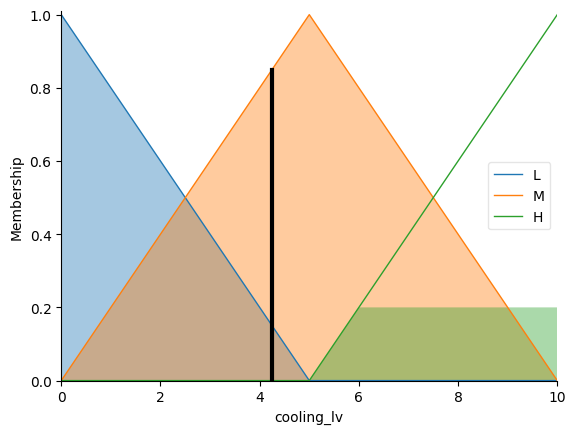

In [ ]:
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['temperature']=25
fuzzy_system.input['humidity']=60
fuzzy_system.input['people']=5
fuzzy_system.compute()
print(fuzzy_system.output['fan_speed'])
print(fuzzy_system.output['cooling_lv'])
fan_speed.view(sim=fuzzy_system)
cooling_lv.view(sim=fuzzy_system)

In [ ]:
#2.6
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
weight=ctrl.Antecedent(np.arange(0,11,1),'weight')
type_food=ctrl.Antecedent(np.arange(0,11,1),'type_food')
temperature=ctrl.Antecedent(np.arange(0,61,1),'temperature')
time=ctrl.Consequent(np.arange(0,11,1),'time')
pressure=ctrl.Consequent(np.arange(0,101,1),'pressure')
weight['L']=fuzz.trimf(weight.universe,[0,0,5])
weight['M']=fuzz.trimf(weight.universe,[0,5,10])
weight['H']=fuzz.trimf(weight.universe,[5,10,10])
type_food['S']=fuzz.trimf(type_food.universe,[0,0,5])
type_food['M']=fuzz.trimf(type_food.universe,[0,5,10])
type_food['H']=fuzz.trimf(type_food.universe,[5,10,10])
temperature['C']=fuzz.trimf(temperature.universe,[0,0,10])
temperature['W']=fuzz.trimf(temperature.universe,[10,20,30])
temperature['H']=fuzz.trimf(temperature.universe,[30,40,60])
time['S']=fuzz.trimf(time.universe,[0,0,5])
time['M']=fuzz.trimf(time.universe,[0,5,10])
time['L']=fuzz.trimf(time.universe,[5,10,10])
pressure['L']=fuzz.trimf(pressure.universe,[0,0,30])
pressure['M']=fuzz.trimf(pressure.universe,[30,50,60])
pressure['H']=fuzz.trimf(pressure.universe,[60,80,100])

In [ ]:
rule1=ctrl.Rule(weight['L'] ,time['S'])
rule2=ctrl.Rule(weight['M'] ,time['M'])
rule3=ctrl.Rule(weight['H'] ,time['L'])
rule4=ctrl.Rule(type_food['S'] ,pressure['L'])
rule5=ctrl.Rule(type_food['M'] ,pressure['M'])
rule6=ctrl.Rule(type_food['H'] ,pressure['H'])
rule7=ctrl.Rule(temperature['C'] ,time['L'])
rule8=ctrl.Rule(temperature['W'] ,time['M'])
rule9=ctrl.Rule(temperature['H'] ,time['S'])
rule10=ctrl.Rule(weight['H'] & type_food['H']&temperature['C'] ,(pressure['H'],time['L']))
rule11=ctrl.Rule(weight['M'] & type_food['S']&temperature['W'] ,(pressure['L'],time['M']))
rule12=ctrl.Rule(weight['L'] & type_food['M']&temperature['H'] ,(pressure['M'],time['S']))

46.666666666666664
5.000000000000001


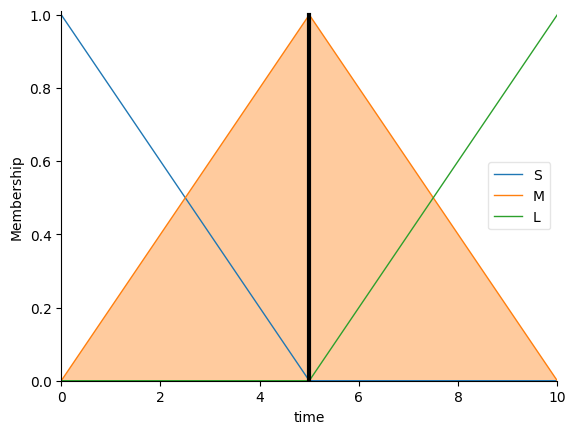

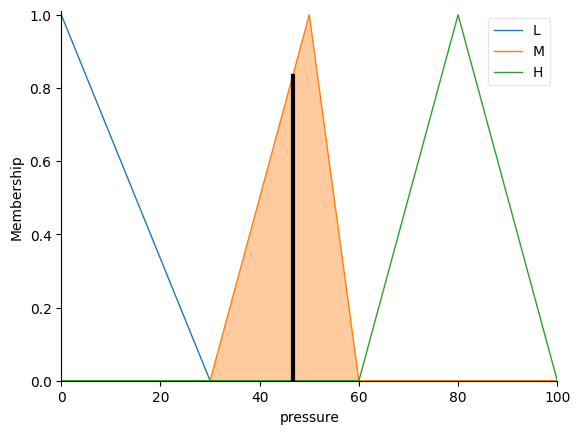

In [ ]:
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['weight']=5
fuzzy_system.input['type_food']=5
fuzzy_system.input['temperature']=80
fuzzy_system.compute()
print(fuzzy_system.output['pressure'])
print(fuzzy_system.output['time'])
time.view(sim=fuzzy_system)
pressure.view(sim=fuzzy_system)

In [ ]:
#2.7
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
weight=ctrl.Antecedent(np.arange(0,11,1),'weight')
type_food=ctrl.Antecedent(np.arange(0,11,1),'type_food')
temperature=ctrl.Antecedent(np.arange(0,61,1),'temperature')
water=ctrl.Antecedent(np.arange(0,11,1),'water')
time=ctrl.Consequent(np.arange(0,11,1),'time')
pressure=ctrl.Consequent(np.arange(0,101,1),'pressure')
weight['L']=fuzz.trimf(weight.universe,[0,0,5])
weight['M']=fuzz.trimf(weight.universe,[0,5,10])
weight['H']=fuzz.trimf(weight.universe,[5,10,10])
type_food['S']=fuzz.trimf(type_food.universe,[0,0,5])
type_food['M']=fuzz.trimf(type_food.universe,[0,5,10])
type_food['H']=fuzz.trimf(type_food.universe,[5,10,10])
temperature['C']=fuzz.trimf(temperature.universe,[0,0,10])
temperature['W']=fuzz.trimf(temperature.universe,[10,20,30])
temperature['H']=fuzz.trimf(temperature.universe,[30,40,60])
water['L']=fuzz.trimf(water.universe,[0,0,5])
water['M']=fuzz.trimf(water.universe,[0,5,10])
water['H']=fuzz.trimf(water.universe,[5,10,10])
time['S']=fuzz.trimf(time.universe,[0,0,5])
time['M']=fuzz.trimf(time.universe,[0,5,10])
time['L']=fuzz.trimf(time.universe,[5,10,10])
pressure['L']=fuzz.trimf(pressure.universe,[0,0,30])
pressure['M']=fuzz.trimf(pressure.universe,[30,50,60])
pressure['H']=fuzz.trimf(pressure.universe,[60,80,100])

In [ ]:
rule1=ctrl.Rule(weight['L'] ,time['S'])
rule2=ctrl.Rule(weight['M'] ,time['M'])
rule3=ctrl.Rule(weight['H'] ,time['L'])
rule4=ctrl.Rule(type_food['S'] ,pressure['L'])
rule5=ctrl.Rule(type_food['M'] ,pressure['M'])
rule6=ctrl.Rule(type_food['H'] ,pressure['H'])
rule7=ctrl.Rule(temperature['C'] ,time['L'])
rule8=ctrl.Rule(temperature['W'] ,time['M'])
rule9=ctrl.Rule(temperature['H'] ,time['S'])
rule10=ctrl.Rule(water['L'] ,pressure['L'])
rule11=ctrl.Rule(water['M'] ,pressure['M'])
rule12=ctrl.Rule(water['H'] ,pressure['H'])
rule13=ctrl.Rule(weight['H'] & type_food['H']&temperature['C'] &water['H'] ,(pressure['H'],time['L']))
rule14=ctrl.Rule(weight['M'] & type_food['S']&temperature['W']&water['L'] ,(pressure['L'],time['M']))
rule15=ctrl.Rule(weight['L'] & type_food['M']&temperature['H']&water['M'] ,(pressure['M'],time['S']))

46.666666666666664
5.000000000000001


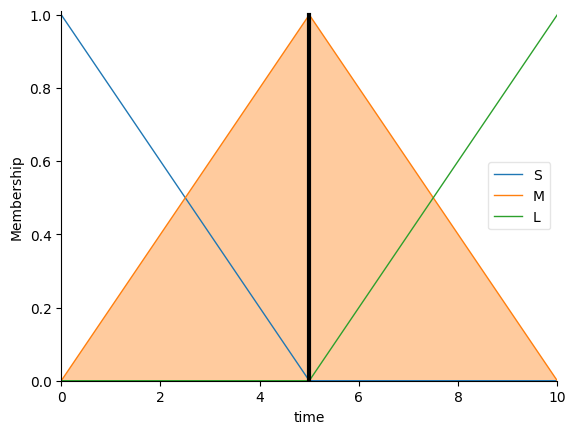

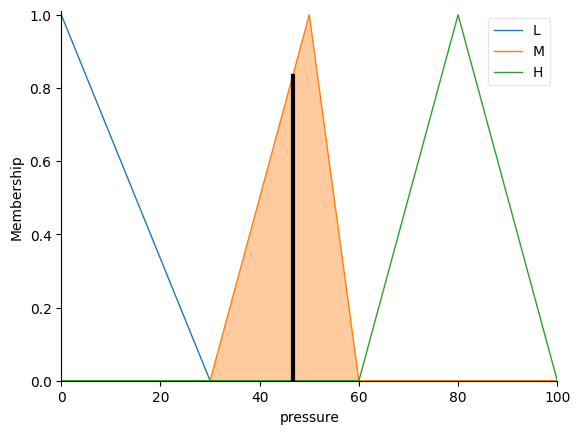

In [ ]:
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['weight']=5
fuzzy_system.input['type_food']=5
fuzzy_system.input['temperature']=80
fuzzy_system.input['water']=5
fuzzy_system.compute()
print(fuzzy_system.output['pressure'])
print(fuzzy_system.output['time'])
time.view(sim=fuzzy_system)
pressure.view(sim=fuzzy_system)

In [ ]:
#2.8
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
rate=ctrl.Antecedent(np.arange(0,150,1),'rate')
pressure=ctrl.Antecedent(np.arange(0,101,1),'pressure')
temperature=ctrl.Antecedent(np.arange(0,40,1),'temperature')
SpO2=ctrl.Antecedent(np.arange(0,101,1),'SpO2')
sugar=ctrl.Antecedent(np.arange(0,201,1),'sugar')
insulin=ctrl.Consequent(np.arange(0,11,1),'insulin')
infusion=ctrl.Consequent(np.arange(0,11,1),'infusion')
oxy=ctrl.Consequent(np.arange(0,11,1),'oxy')
rate['L']=fuzz.trimf(rate.universe,[0,0,60])
rate['N']=fuzz.trimf(rate.universe,[60,80,100])
rate['H']=fuzz.trimf(rate.universe,[100,150,150])
pressure['L']=fuzz.trimf(pressure.universe,[0,0,30])
pressure['M']=fuzz.trimf(pressure.universe,[30,50,70])
pressure['H']=fuzz.trimf(pressure.universe,[50,100,100])
temperature['L']=fuzz.trimf(temperature.universe,[0,0,36])
temperature['N']=fuzz.trimf(temperature.universe,[36,36,37.5])
temperature['H']=fuzz.trimf(temperature.universe,[37.5,40,40])
SpO2['L']=fuzz.trimf(SpO2.universe,[0,0,90])
SpO2['N']=fuzz.trimf(SpO2.universe,[90,90,100])
sugar['L']=fuzz.trimf(sugar.universe,[0,0,70])
sugar['N']=fuzz.trimf(sugar.universe,[70,140,140])
sugar['H']=fuzz.trimf(sugar.universe,[140,180,180])
insulin['D']=fuzz.trimf(insulin.universe,[0,0,5])
insulin['M']=fuzz.trimf(insulin.universe,[0,5,10])
insulin['I']=fuzz.trimf(insulin.universe,[5,10,10])
infusion['R']=fuzz.trimf(infusion.universe,[0,0,5])
infusion['M']=fuzz.trimf(infusion.universe,[0,5,10])
infusion['I']=fuzz.trimf(infusion.universe,[5,10,10])
oxy['R']=fuzz.trimf(oxy.universe,[0,0,5])
oxy['M']=fuzz.trimf(oxy.universe,[0,5,10])
oxy['I']=fuzz.trimf(oxy.universe,[5,10,10])




In [ ]:
rule1=ctrl.Rule(rate['L'] & pressure['L'] ,( insulin['I'],infusion['I']))
rule2=ctrl.Rule(rate['H'] & pressure['H'] , insulin['I'])
rule3=ctrl.Rule(rate['N'] & pressure['M'] , insulin['M'])
rule4=ctrl.Rule(temperature['H'] & SpO2['L'],(oxy['I'],insulin['I']))
rule5=ctrl.Rule(temperature['N'] & SpO2['N'],(oxy['M'],infusion['M']))
rule6=ctrl.Rule(temperature['L'] & SpO2['L'],(oxy['I'],infusion['I']))
rule7=ctrl.Rule(sugar['H'] ,insulin['I'])
rule8=ctrl.Rule(sugar['L'] ,insulin['D'])
rule9=ctrl.Rule(sugar['N'] ,insulin['M'])
rule10=ctrl.Rule(temperature['H'] & pressure['H'] &SpO2['N'],(oxy['I'],insulin['I']))
rule11=ctrl.Rule(pressure['L'] &SpO2['L']&rate['L'],(oxy['I'],insulin['I'],infusion['I']))
rule12=ctrl.Rule(sugar['H'] & pressure['H'] &rate['H'],(insulin['D']))
rule13=ctrl.Rule(pressure['L'],infusion['I'])
rule_default = ctrl.Rule(rate['N'] | pressure['M'] | temperature['N'] | SpO2['N']|sugar['N'],(infusion['M'],oxy["R"],insulin['M']))

5.000000000000001
5.000000000000001
1.6666666666666665


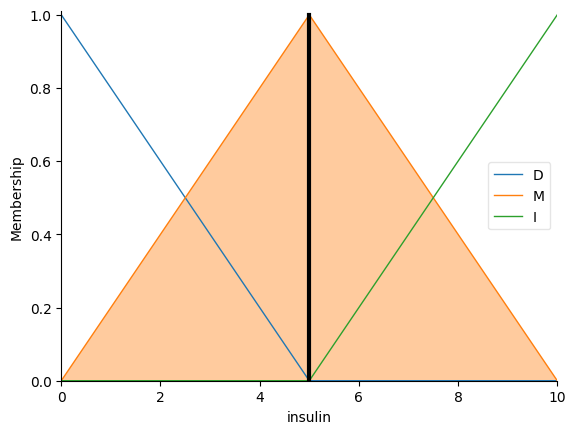

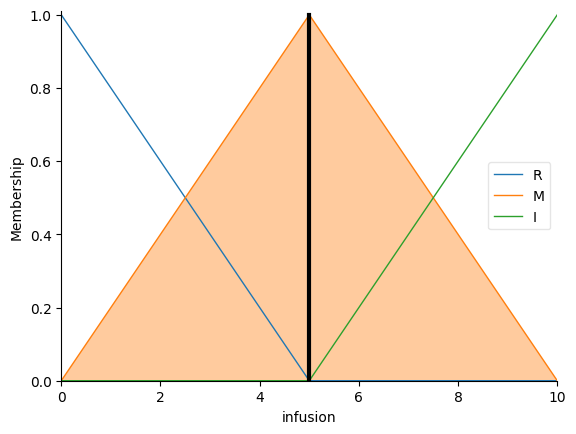

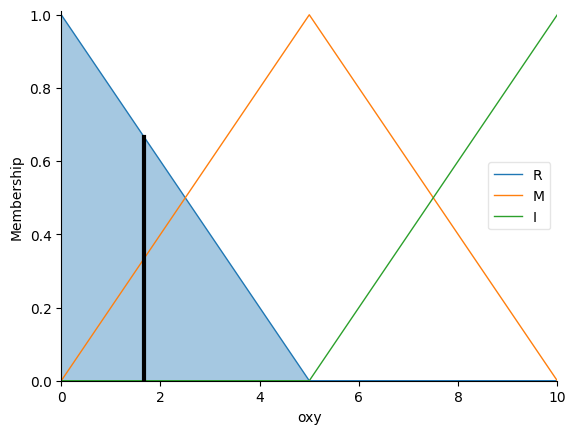

In [ ]:
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule_default])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['rate']=100
fuzzy_system.input['pressure']=70
fuzzy_system.input['temperature']=37
fuzzy_system.input['SpO2']=9
fuzzy_system.input['sugar']=140
fuzzy_system.compute()
print(fuzzy_system.output['insulin'])
print(fuzzy_system.output['infusion'])
print(fuzzy_system.output['oxy'])
insulin.view(sim=fuzzy_system)
infusion.view(sim=fuzzy_system)
oxy.view(sim=fuzzy_system)

In [ ]:
#2.9
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
sentiment_score=ctrl.Antecedent(np.arange(0,11,1),'sentiment_score')
emotion_intensity=ctrl.Antecedent(np.arange(0,11,1),'emotion_intensity')
positive_recview=ctrl.Antecedent(np.arange(0,11,1),'positive_review')
negative_review=ctrl.Antecedent(np.arange(0,11,1),'negative_review')
classification=ctrl.Consequent(np.arange(0,11,1),'classification')
sentiment_score['N']=fuzz.trimf(sentiment_score.universe,[0,0,3])
sentiment_score['M']=fuzz.trimf(sentiment_score.universe,[3,5,7])
sentiment_score['P']=fuzz.trimf(sentiment_score.universe,[7,10,10])
emotion_intensity['L']=fuzz.trimf(emotion_intensity.universe,[0,0,3])
emotion_intensity['M']=fuzz.trimf(emotion_intensity.universe,[3,5,7])
emotion_intensity['H']=fuzz.trimf(emotion_intensity.universe,[7,10,10])
positive_recview['F']=fuzz.trimf(positive_recview.universe,[0,0,2])
positive_recview['S']=fuzz.trimf(positive_recview.universe,[3,3,5])
positive_recview['M']=fuzz.trimf(positive_recview.universe,[5,10,10])
negative_review['F']=fuzz.trimf(negative_review.universe,[0,0,2])
negative_review['S']=fuzz.trimf(negative_review.universe,[3,3,5])
negative_review['M']=fuzz.trimf(negative_review.universe,[5,10,10])
classification['N']=fuzz.trimf(classification.universe,[0,0,5])
classification['M']=fuzz.trimf(classification.universe,[0,5,10])
classification['P']=fuzz.trimf(classification.universe,[5,10,10])

In [ ]:
rule1=ctrl.Rule(sentiment_score['N'] & emotion_intensity['H'] ,classification['N'])
rule2=ctrl.Rule(sentiment_score['M'] & emotion_intensity['L'] ,classification['M'])
rule3=ctrl.Rule(sentiment_score['M'] & emotion_intensity['M'] ,classification['M'])
rule4=ctrl.Rule(sentiment_score['P'] & emotion_intensity['H'] ,classification['P'])
rule5=ctrl.Rule(positive_recview['M'] & negative_review['F'] ,classification['P'])
rule6=ctrl.Rule(positive_recview['F'] & negative_review['M'] ,classification['N'])
rule7=ctrl.Rule(positive_recview['S'] & negative_review['S'] ,classification['M'])
rule8=ctrl.Rule(sentiment_score['N']  & negative_review['M']&emotion_intensity['H'] ,classification['N'])
rule9=ctrl.Rule(sentiment_score['M']  & positive_recview['S']&emotion_intensity['M'] ,classification['M'])
rule10=ctrl.Rule(sentiment_score['P']  & positive_recview['M']&emotion_intensity['H'] ,classification['P'])


5.000000000000001


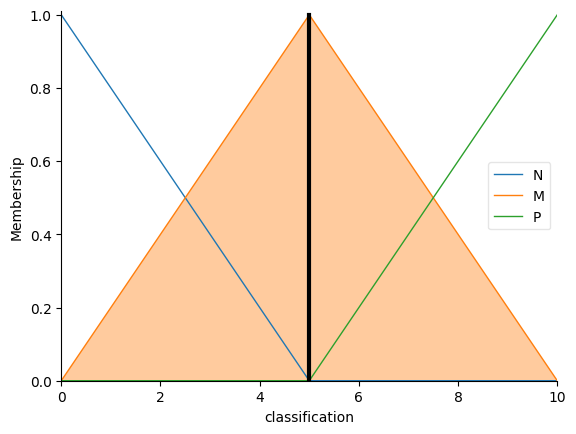

In [ ]:
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['sentiment_score']=5
fuzzy_system.input['emotion_intensity']=5
fuzzy_system.input['positive_review']=5
fuzzy_system.input['negative_review']=5
fuzzy_system.compute()
print(fuzzy_system.output['classification'])
classification.view(sim=fuzzy_system)

In [ ]:
#2.11
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
demand=ctrl.Antecedent(np.arange(0,16,1),'demand')
competitor=ctrl.Antecedent(np.arange(0,11,1),'competitor')
production=ctrl.Antecedent(np.arange(0,16,1),'production')
seasonality=ctrl.Antecedent(np.arange(0,11,1),'seasonality')
stock=ctrl.Antecedent(np.arange(0,16,1),'stock')
final_price=ctrl.Consequent(np.arange(0,21,1),'final_price')
demand['very_low']=fuzz.trimf(demand.universe,[0,0,5])
demand['low']=fuzz.trimf(demand.universe,[0,5,10])
demand['medium']=fuzz.trimf(demand.universe,[5,10,15])
demand['high']=fuzz.trimf(demand.universe,[10,15,15])
competitor['low']=fuzz.trimf(competitor.universe,[0,0,5])
competitor['medium']=fuzz.trimf(competitor.universe,[0,5,10])
competitor['high']=fuzz.trimf(competitor.universe,[5,10,10])
production['very_low']=fuzz.trimf(production.universe,[0,0,5])
production['low']=fuzz.trimf(production.universe,[0,5,10])
production['medium']=fuzz.trimf(production.universe,[5,10,15])
production['high']=fuzz.trimf(production.universe,[10,15,20])
seasonality['off_peak']=fuzz.trimf(seasonality.universe,[0,0,5])
seasonality['normal']=fuzz.trimf(seasonality.universe,[0,5,10])
seasonality['peak']=fuzz.trimf(seasonality.universe,[5,10,10])
stock['low']=fuzz.trimf(stock.universe,[0,0,5])
stock['medium']=fuzz.trimf(stock.universe,[0,5,10])
stock['high']=fuzz.trimf(stock.universe,[5,10,15])
stock['very_high']=fuzz.trimf(stock.universe,[10,15,15])
final_price['very_low']=fuzz.trimf(final_price.universe,[0,0,5])
final_price['low']=fuzz.trimf(final_price.universe,[0,5,10])
final_price['medium']=fuzz.trimf(final_price.universe,[5,10,15])
final_price['high']=fuzz.trimf(final_price.universe,[10,15,20])
final_price['very_high']=fuzz.trimf(final_price.universe,[15,20,20])

In [ ]:
rule1=ctrl.Rule(demand['high'] & competitor['high']  & stock['low'],final_price['very_high'])
rule2=ctrl.Rule(demand['high'] & seasonality['peak']  & stock['low'],final_price['very_high'])
rule3=ctrl.Rule(demand['medium'] & production['high']  & stock['low'],final_price['very_high'])
rule4=ctrl.Rule(demand['high'] & competitor['medium']  & stock['medium'],final_price['high'])
rule5=ctrl.Rule(demand['medium'] & competitor['high']  & stock['low'],final_price['high'])
rule6=ctrl.Rule(demand['high'] & seasonality['peak']  & stock['medium'],final_price['high'])
rule7=ctrl.Rule(demand['medium'] & production['medium']  & stock['medium'],final_price['medium'])
rule8=ctrl.Rule(demand['low'] & competitor['high']  & stock['medium'],final_price['medium'])
rule9=ctrl.Rule(demand['medium'] & competitor['medium']  & stock['medium'],final_price['medium'])
rule10=ctrl.Rule(demand['low'] & competitor['low']  & stock['high'],final_price['low'])
rule11=ctrl.Rule(demand['medium'] & production['low']  & stock['high'],final_price['low'])
rule12=ctrl.Rule(demand['low'] & seasonality['off_peak']  & stock['high'],final_price['low'])
rule13=ctrl.Rule(demand['low'] & competitor['low']  & stock['very_high'],final_price['very_low'])
rule14=ctrl.Rule(demand['medium'] & production['very_low']  & stock['very_high'],final_price['very_low'])
rule15=ctrl.Rule(demand['very_low'] & seasonality['off_peak']  & stock['very_high'],final_price['very_low'])
rule_default = ctrl.Rule(demand['medium'] | competitor['medium'] | production['medium'] | seasonality['normal'] | stock['medium'], final_price['medium'])

10.000000000000002


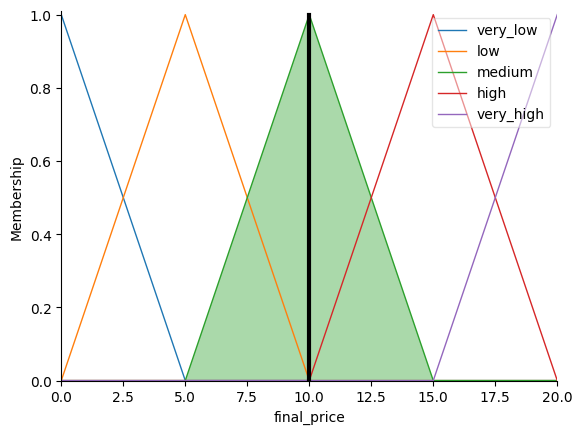

In [ ]:
ctrl_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule_default])
final_price_simulator=ctrl.ControlSystemSimulation(ctrl_system)
final_price_simulator.input['demand']=10
final_price_simulator.input['competitor']=10
final_price_simulator.input['production']=10
final_price_simulator.input['seasonality']=10
final_price_simulator.input['stock']=10
final_price_simulator.compute()
print(final_price_simulator.output['final_price'])
final_price.view(sim=final_price_simulator)

In [ ]:
#baitap1
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
trafic=ctrl.Antecedent(np.arange(0,101,1),'traffic')
distance=ctrl.Antecedent(np.arange(0,51,1),'distance')
demand=ctrl.Antecedent(np.arange(0,101,1),'demand')
weather=ctrl.Antecedent(np.arange(0,11,1),'weather')
rating=ctrl.Antecedent(np.arange(1,5.1,0.5),'rating')
punctuality=ctrl.Antecedent(np.arange(0,101,1),'punctuality')
price=ctrl.Consequent(np.arange(0,16,1),'price')
cus_point=ctrl.Consequent(np.arange(0,11,1),'cus_point')
trafic['low']=fuzz.trimf(trafic.universe,[0,0,30])
trafic['medium']=fuzz.trimf(trafic.universe,[20,70,70])
trafic['high']=fuzz.trimf(trafic.universe,[60,100,100])
distance['short']=fuzz.trimf(distance.universe,[0,0,3])
distance['medium']=fuzz.trimf(distance.universe,[2,8,8])
distance['long']=fuzz.trimf(distance.universe,[6,20,20])
distance['very_long']=fuzz.trimf(distance.universe,[15,50,50])
demand['low']=fuzz.trimf(demand.universe,[0,0,30])
demand['medium']=fuzz.trimf(demand.universe,[20,70,70])
demand['high']=fuzz.trimf(demand.universe,[60,100,100])
weather['clear']=fuzz.trimf(weather.universe,[0,0,5])
weather['light']=fuzz.trimf(weather.universe,[0,5,10])
weather['stormy']=fuzz.trimf(weather.universe,[5,10,10])
rating['poor']=fuzz.trimf(rating.universe,[1,1,2.5])
rating['average']=fuzz.trimf(rating.universe,[2,4,4])
rating['good']=fuzz.trimf(rating.universe,[3.5,5,5])
punctuality['late']=fuzz.trimf(punctuality.universe,[0,0,50])
punctuality['on_time']=fuzz.trimf(punctuality.universe,[40,80,80])
punctuality['early']=fuzz.trimf(punctuality.universe,[70,100,100])
price['low']=fuzz.trimf(price.universe,[0,0,5])
price['medium']=fuzz.trimf(price.universe,[0,5,10])
price['high']=fuzz.trimf(price.universe,[5,10,15])
price['very_high']=fuzz.trimf(price.universe,[10,15,15])
cus_point['none']=fuzz.trimf(cus_point.universe,[0,0,5])
cus_point['moderate']=fuzz.trimf(cus_point.universe,[0,5,10])
cus_point['high']=fuzz.trimf(cus_point.universe,[5,10,10])


In [ ]:
rule1=ctrl.Rule(distance['short']&trafic['low']&demand['low'],price['low'])
rule2=ctrl.Rule(distance['short']&trafic['medium']&demand['high'],price['medium'])
rule3=ctrl.Rule(distance['medium']&trafic['high']&demand['high'],price['high'])
rule4=ctrl.Rule(distance['long']&trafic['medium']&weather['clear'],price['medium'])
rule5=ctrl.Rule(distance['long']&trafic['high']&weather['stormy'],price['very_high'])
rule6=ctrl.Rule(distance['very_long']&trafic['high']&demand['high'],price['high'])
rule7=ctrl.Rule(distance['medium']&trafic['low']&demand['low'],price['medium'])
rule8=ctrl.Rule(distance['short']&trafic['high']&weather['stormy'],price['high'])
rule9=ctrl.Rule(distance['very_long']&weather['stormy'],price['very_high'])
rule10=ctrl.Rule(distance['medium']&trafic['medium']&weather['light'],price['medium'])
rule11=ctrl.Rule(rating['good']&punctuality['early'],cus_point['high'])
rule12=ctrl.Rule(rating['average']&punctuality['on_time'],cus_point['moderate'])
rule13=ctrl.Rule(rating['poor']&punctuality['late'],cus_point['none'])
rule14=ctrl.Rule(distance['long']&trafic['high']&punctuality['early'],cus_point['high'])
rule15=ctrl.Rule(distance['medium']&trafic['medium']&rating['good'],cus_point['high'])
rule16=ctrl.Rule(rating['poor']&punctuality['late'],cus_point['none'])
rule17=ctrl.Rule(distance['very_long']&weather['stormy']&rating['good'],cus_point['high'])
rule18=ctrl.Rule(distance['short']&rating['average']&punctuality['on_time'],cus_point['none'])
rule19=ctrl.Rule(distance['short']&trafic['high']&punctuality['late'],cus_point['none'])
rule20=ctrl.Rule(distance['medium']&weather['light']&rating['good'],cus_point['moderate'])
rule_default = ctrl.Rule(distance['medium'] | trafic['medium'] | demand['medium'] | weather['light'] | rating['average'] | punctuality['on_time'], (cus_point['moderate'], price['medium']))

4.999999999999999
4.999999999999999


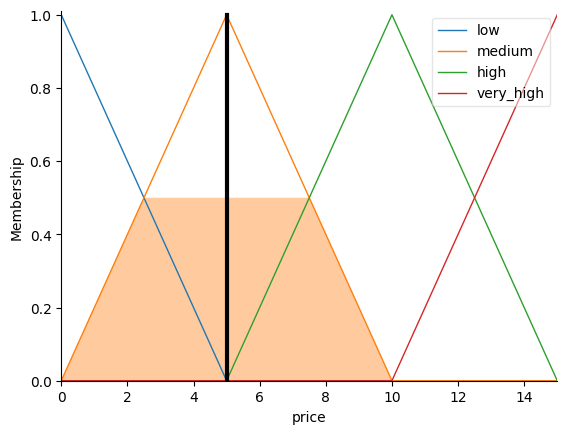

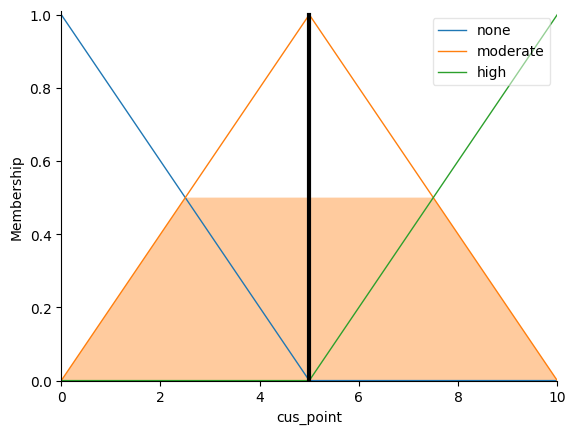

In [ ]:
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule_default])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['distance']=10
fuzzy_system.input['traffic']=10
fuzzy_system.input['demand']=10
fuzzy_system.input['weather']=10
fuzzy_system.input['rating']=3
fuzzy_system.input['punctuality']=10
fuzzy_system.compute()
print(fuzzy_system.output['price'])
print(fuzzy_system.output['cus_point'])
price.view(sim=fuzzy_system)
cus_point.view(sim=fuzzy_system)


In [ ]:
#baitap2
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
store_rating=ctrl.Antecedent(np.arange(0,6,1),'store_rating')
sale_volume=ctrl.Antecedent(np.arange(0,11,1),'sale_volume')
profit=ctrl.Antecedent(np.arange(0,11,1),'profit')
event=ctrl.Antecedent(np.arange(0,11,1),'event')
competitor=ctrl.Antecedent(np.arange(0,11,1),'competitor')
discount=ctrl.Consequent(np.arange(0,71,1),'discount')
store_rating['low']=fuzz.trimf(store_rating.universe,[0,0,4])
store_rating['medium']=fuzz.trimf(store_rating.universe,[4,4.5,4.5])
store_rating['high']=fuzz.trimf(store_rating.universe,[4.5,5,5])
sale_volume['low']=fuzz.trimf(sale_volume.universe,[0,0,5])
sale_volume['medium']=fuzz.trimf(sale_volume.universe,[0,5,10])
sale_volume['high']=fuzz.trimf(sale_volume.universe,[5,10,10])
profit['low']=fuzz.trimf(profit.universe,[0,0,5])
profit['medium']=fuzz.trimf(profit.universe,[0,5,10])
profit['high']=fuzz.trimf(profit.universe,[5,10,10])
event['none']=fuzz.trimf(event.universe,[0,0,5])
event['moderate']=fuzz.trimf(event.universe,[0,5,10])
event['high']=fuzz.trimf(event.universe,[5,10,10])
competitor['low']=fuzz.trimf(competitor.universe,[0,0,5])
competitor['medium']=fuzz.trimf(competitor.universe,[0,5,10])
competitor['high']=fuzz.trimf(competitor.universe,[5,10,10])
discount['very_low']=fuzz.trimf(discount.universe,[0,0,5])
discount['low']=fuzz.trimf(discount.universe,[5,10,10])
discount['medium']=fuzz.trimf(discount.universe,[10,20,20])
discount['high']=fuzz.trimf(discount.universe,[20,40,40])
discount['very_high']=fuzz.trimf(discount.universe,[40,70,70])

In [ ]:
rule1=ctrl.Rule(store_rating['high']&sale_volume['high']&profit['high'],discount['very_low'])
rule2=ctrl.Rule(store_rating['low']&sale_volume['low']&profit['high'],discount['high'])
rule3=ctrl.Rule(event['high']&competitor['high'],discount['very_high'])
rule4=ctrl.Rule(store_rating['medium']&sale_volume['medium']&profit['medium'],discount['medium'])
rule5=ctrl.Rule(profit['low']&competitor['low']&sale_volume['high'],discount['very_low'])
rule6=ctrl.Rule(store_rating['low']&event['none'],discount['medium'])
rule7=ctrl.Rule(sale_volume['low']&profit['low'],discount['very_high'])

60.000000000000014


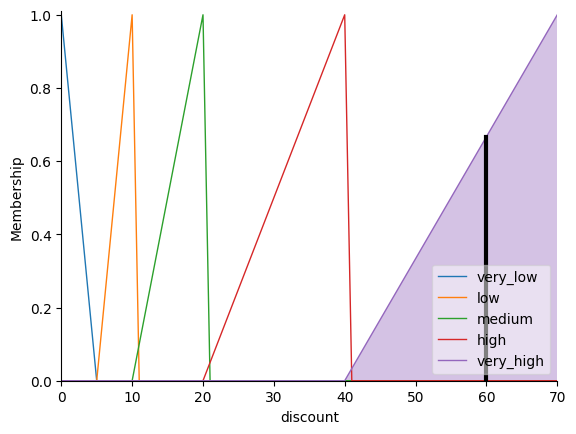

In [ ]:
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['store_rating']=4.3
fuzzy_system.input['sale_volume']=6
fuzzy_system.input['profit']=4
fuzzy_system.input['event']=10
fuzzy_system.input['competitor']=10
fuzzy_system.compute()
print(fuzzy_system.output['discount'])
discount.view(sim=fuzzy_system)

In [ ]:
#baitap3
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
demand_level=ctrl.Antecedent(np.arange(0,11,1),'demand_level')
competitor_pressure_level=ctrl.Antecedent(np.arange(0,11,1),'competitor_pressure_level')
store_reputation_level=ctrl.Antecedent(np.arange(0,6,1),'store_reputation_level')
profit_margin_level=ctrl.Antecedent(np.arange(0,11,1),'profit_margin_level')
seasonal_demand_level=ctrl.Antecedent(np.arange(0,11,1),'seasonal_demand_level')
discount=ctrl.Consequent(np.arange(0,71,1),'discount')
discount['very_low']=fuzz.trimf(discount.universe,[0,0,5])
discount['low']=fuzz.trimf(discount.universe,[5,10,10])
discount['medium']=fuzz.trimf(discount.universe,[10,20,20])
discount['high']=fuzz.trimf(discount.universe,[20,40,40])
discount['very_high']=fuzz.trimf(discount.universe,[40,70,70])
demand_level['low']=fuzz.trimf(demand.universe,[0,0,5])
demand_level['medium']=fuzz.trimf(demand.universe,[0,5,10])
demand_level['high']=fuzz.trimf(demand.universe,[5,10,10])
competitor_pressure_level['low']=fuzz.trimf(competitor.universe,[0,0,5])
competitor_pressure_level['medium']=fuzz.trimf(competitor.universe,[0,5,10])
competitor_pressure_level['high']=fuzz.trimf(competitor.universe,[5,10,10])
store_reputation_level['low']=fuzz.trimf(store_rating.universe,[0,0,4])
store_reputation_level['medium']=fuzz.trimf(store_rating.universe,[4,4.5,4.5])
store_reputation_level['high']=fuzz.trimf(store_rating.universe,[4.5,5,5])
profit_margin_level['low']=fuzz.trimf(profit.universe,[0,0,5])
profit_margin_level['medium']=fuzz.trimf(profit.universe,[0,5,10])
profit_margin_level['high']=fuzz.trimf(profit.universe,[5,10,10])
seasonal_demand_level['low']=fuzz.trimf(seasonal.universe,[0,0,5])
seasonal_demand_level['medium']=fuzz.trimf(seasonal.universe,[0,5,10])
seasonal_demand_level['high']=fuzz.trimf(seasonal.universe,[5,10,10])

In [ ]:
    rule1 = ctrl.Rule(demand_level['high'] & competitor_pressure_level['low'] & profit_margin_level['low'], discount['very_low'])
    rule2 = ctrl.Rule(demand_level['low'] & competitor_pressure_level['high'] & profit_margin_level['high'], discount['very_high'])
    rule3 = ctrl.Rule(store_reputation_level['high'] & profit_margin_level['medium'] & seasonal_demand_level['high'], discount['medium'])
    rule4 = ctrl.Rule(competitor_pressure_level['high'] & seasonal_demand_level['high'] & profit_margin_level['high'], discount['very_high'])
    rule5 = ctrl.Rule(store_reputation_level['low'] & demand_level['medium'] & profit_margin_level['low'], discount['medium'])
    rule6 = ctrl.Rule(demand_level['high'] & seasonal_demand_level['low'] & competitor_pressure_level['low'], discount['very_low'])
    rule7 = ctrl.Rule(profit_margin_level['high'] & competitor_pressure_level['medium'] & seasonal_demand_level['medium'], discount['medium'])

56.444444444444414


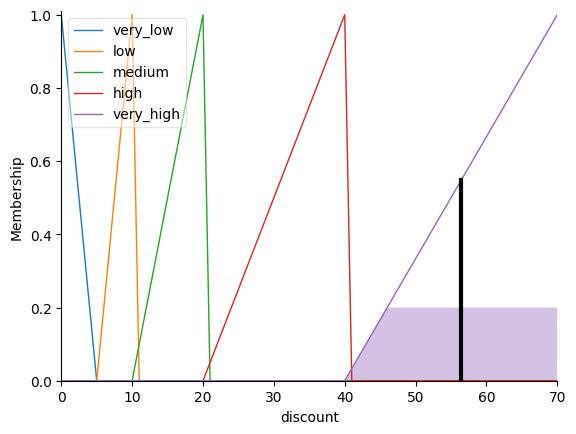

In [ ]:
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['demand_level']=10
fuzzy_system.input['competitor_pressure_level']=6
fuzzy_system.input['store_reputation_level']=4.2
fuzzy_system.input['profit_margin_level']=10
fuzzy_system.input['seasonal_demand_level']=10
fuzzy_system.compute()
print(fuzzy_system.output['discount'])
discount.view(sim=fuzzy_system)

DeliveryPriority: 46.50000000000001
OrdersToCombine: 4.5404040404040416


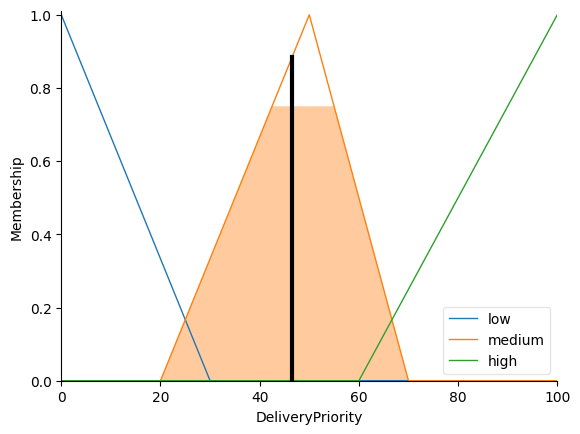

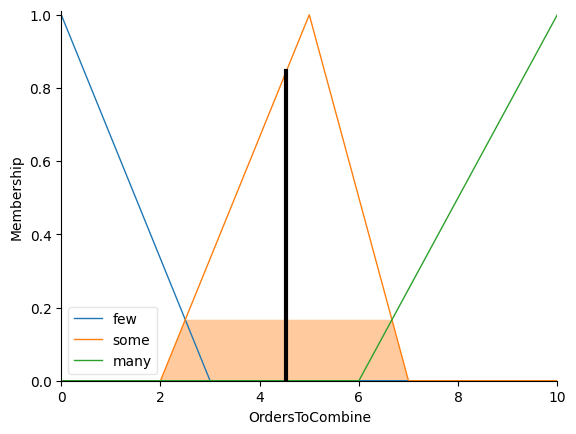

In [ ]:
#baitap4
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


OrderDensity = ctrl.Antecedent(np.arange(0, 101, 1), 'OrderDensity')
DeliveryUrgency = ctrl.Antecedent(np.arange(0, 101, 1), 'DeliveryUrgency')
DriverLoad = ctrl.Antecedent(np.arange(0, 101, 1), 'DriverLoad')
TrafficCondition = ctrl.Antecedent(np.arange(0, 101, 1), 'TrafficCondition')
ProfitPerDelivery = ctrl.Antecedent(np.arange(0, 101, 1), 'ProfitPerDelivery')

OrdersToCombine = ctrl.Consequent(np.arange(0, 11, 1), 'OrdersToCombine')
DeliveryPriority = ctrl.Consequent(np.arange(0, 101, 1), 'DeliveryPriority')

OrderDensity['low'] = fuzz.trimf(OrderDensity.universe, [0, 0, 30])
OrderDensity['medium'] = fuzz.trimf(OrderDensity.universe, [20, 50, 70])
OrderDensity['high'] = fuzz.trimf(OrderDensity.universe, [60, 100, 100])

DeliveryUrgency['low'] = fuzz.trimf(DeliveryUrgency.universe, [0, 0, 30])
DeliveryUrgency['medium'] = fuzz.trimf(DeliveryUrgency.universe, [20, 50, 70])
DeliveryUrgency['high'] = fuzz.trimf(DeliveryUrgency.universe, [60, 100, 100])

DriverLoad['low'] = fuzz.trimf(DriverLoad.universe, [0, 0, 30])
DriverLoad['medium'] = fuzz.trimf(DriverLoad.universe, [20, 50, 70])
DriverLoad['high'] = fuzz.trimf(DriverLoad.universe, [60, 100, 100])

TrafficCondition['low'] = fuzz.trimf(TrafficCondition.universe, [0, 0, 30])
TrafficCondition['medium'] = fuzz.trimf(TrafficCondition.universe, [20, 50, 70])
TrafficCondition['high'] = fuzz.trimf(TrafficCondition.universe, [60, 100, 100])

ProfitPerDelivery['low'] = fuzz.trimf(ProfitPerDelivery.universe, [0, 0, 30])
ProfitPerDelivery['medium'] = fuzz.trimf(ProfitPerDelivery.universe, [20, 50, 70])
ProfitPerDelivery['high'] = fuzz.trimf(ProfitPerDelivery.universe, [60, 100, 100])

OrdersToCombine['few'] = fuzz.trimf(OrdersToCombine.universe, [0, 0, 3])
OrdersToCombine['some'] = fuzz.trimf(OrdersToCombine.universe, [2, 5, 7])
OrdersToCombine['many'] = fuzz.trimf(OrdersToCombine.universe, [6, 10, 10])

DeliveryPriority['low'] = fuzz.trimf(DeliveryPriority.universe, [0, 0, 30])
DeliveryPriority['medium'] = fuzz.trimf(DeliveryPriority.universe, [20, 50, 70])
DeliveryPriority['high'] = fuzz.trimf(DeliveryPriority.universe, [60, 100, 100])

rules = [
    ctrl.Rule(OrderDensity['high'] & DriverLoad['low'] & TrafficCondition['low'],OrdersToCombine['many']),
    ctrl.Rule(OrderDensity['medium'] & TrafficCondition['high'] & DeliveryUrgency['medium'],OrdersToCombine['some']),
    ctrl.Rule(DriverLoad['high'] & OrderDensity['high'] & ProfitPerDelivery['medium'],OrdersToCombine['some']),
    ctrl.Rule(OrderDensity['low'] & DeliveryUrgency['high'] & TrafficCondition['medium'],OrdersToCombine['some']),
    ctrl.Rule(ProfitPerDelivery['high'] & DeliveryUrgency['high'] & TrafficCondition['high'],OrdersToCombine['some']),
    ctrl.Rule(DeliveryUrgency['high'] & ProfitPerDelivery['high'],DeliveryPriority['high']),
    ctrl.Rule(DeliveryUrgency['medium'] & TrafficCondition['medium'],DeliveryPriority['medium']),
    ctrl.Rule(DeliveryUrgency['low'] & OrderDensity['high'] & ProfitPerDelivery['low'],DeliveryPriority['low']),
    ctrl.Rule(OrderDensity['high'] & DriverLoad['low'] & TrafficCondition['medium'] &DeliveryUrgency['medium'] & ProfitPerDelivery['medium'],(OrdersToCombine['some'],DeliveryPriority['medium']))
]

control_system = ctrl.ControlSystem(rules)
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['OrderDensity'] = 95
fuzzy_system.input['DeliveryUrgency'] = 55
fuzzy_system.input['DriverLoad'] = 25
fuzzy_system.input['TrafficCondition'] = 50
fuzzy_system.input['ProfitPerDelivery'] = 55

fuzzy_system.compute()

print('DeliveryPriority:',fuzzy_system.output['DeliveryPriority'])
print('OrdersToCombine:',fuzzy_system.output['OrdersToCombine'])
DeliveryPriority.view(sim=fuzzy_system)
OrdersToCombine.view(sim=fuzzy_system)